In [1]:
import pandas as pd
import numpy as n
data = pd.read_csv("modified_ver4.csv")
data.head()

,vote_average,vote_count,revenue,runtime,adult,budget,release_year,release_month,release_day_of_week,release_day_of_year,...,sqrt(company_combo_score)*runtime**3,sqrt(vote_average)/genre_combo_score,release_day_of_week*sqrt(vote_total),company_combo_score*release_day_of_week,sqrt(release_day_of_week)*sqrt(vote_average),sqrt(revenue)*sqrt(vote_total),profit*exp(release_day_of_week),release_day_of_year**3*vote_count,company_combo_score**3*release_day_of_week**3,popularity
0,7.00,1.0,0.0,6.0,0.0,0.0,1948.0,11.0,0.0,306.0,...,0.0,0.881917,0.000000,0.0,0.000000,0.0,0.0,28652616.0,0.0,0.600
1,6.00,3.0,0.0,7.0,0.0,0.0,1978.0,12.0,5.0,357.0,...,0.0,0.064460,21.213203,0.0,5.477226,0.0,0.0,136497879.0,0.0,0.739
2,6.37,27.0,0.0,5.0,0.0,0.0,1982.0,7.0,6.0,192.0,...,0.0,0.087031,78.686975,0.0,6.182233,0.0,0.0,191102976.0,0.0,1.291
3,0.00,0.0,0.0,3.0,0.0,0.0,2018.0,1.0,0.0,1.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.600
4,9.00,1.0,0.0,3.0,0.0,0.0,2020.0,5.0,2.0,134.0,...,0.0,1.000000,6.000000,0.0,4.242641,0.0,0.0,2406104.0,0.0,0.600


In [ ]:
# Count null values in each column
data.isnull().sum()

,0
vote_average,0
vote_count,0
revenue,0
runtime,0
adult,0
budget,0
title_length,0
profit,0
vote_total,0
release_year,0


In [ ]:
# Drop rows with null values
data = data.dropna()
data.shape

(8248, 45)

## Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [ ]:
# Generate train and test sets
X = data.drop(columns=['popularity'])  # Drop the target column to use all others as features
y = data['popularity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Decision Tree Model

In [ ]:
# Decision Tree Regressor
print("Training Decision Tree Regressor...")
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
dt_grid.fit(X_train, y_train)

Training Decision Tree Regressor...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best model and evaluation
best_dt = dt_grid.best_estimator_
print(f"Best Hyperparameters: {dt_grid.best_params_}")
dt_predictions = best_dt.predict(X_test)

print("Decision Tree Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, dt_predictions))}")
print(f"MSE: {mean_squared_error(y_test, dt_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, dt_predictions)}")
print(f"R^2 Score: {r2_score(y_test, dt_predictions)}")

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Metrics:
RMSE: 0.6808933147657895
MSE: 0.46361570609274455
MAE: 0.3148400675982009
R^2 Score: 0.7205830976272996


### Train Linear Regression

In [ ]:
# Linear Regression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


Training Linear Regression...


In [ ]:
# Evaluation
print("Linear Regression Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_predictions))}")
print(f"MSE: {mean_squared_error(y_test, lr_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, lr_predictions)}")
print(f"R^2 Score: {r2_score(y_test, lr_predictions)}")

Linear Regression Metrics:
RMSE: 0.6484914260756751
MSE: 0.42054112969366275
MAE: 0.29816397993421745
R^2 Score: 0.7465437468250642


In [ ]:
# Cross-validation scores
dt_cv_score = cross_val_score(best_dt, X, y, cv=5, scoring='r2')
lr_cv_score = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

print("\nCross-Validation R^2 Scores:")
print(f"Decision Tree: {dt_cv_score.mean()} (+/- {dt_cv_score.std()})")
print(f"Linear Regression: {lr_cv_score.mean()} (+/- {lr_cv_score.std()})")


Cross-Validation R^2 Scores:
Decision Tree: 0.6957875458934006 (+/- 0.0580443920923353)
Linear Regression: 0.5292887498458727 (+/- 0.29686525023378246)


### Train SVR Model

In [ ]:
# model building
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used in regression tasks
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
svr_predictions = svr_model.predict(X_test)

In [ ]:
# Evaluation
print("SVR Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_predictions))}")
print(f"MSE: {mean_squared_error(y_test, svr_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, svr_predictions)}")
print(f"R^2 Score: {r2_score(y_test, svr_predictions)}")

SVR Metrics:
RMSE: 0.9271585466570197
MSE: 0.859622970639157
MAE: 0.40637710851160086
R^2 Score: 0.4819131782900332


### Train KNN Model

In [ ]:
# model building
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# model prediction
knn_predictions = knn_model.predict(X_test)
knn_predictions

array([0.8195, 0.6296, 0.6   , ..., 0.67  , 1.4614, 0.6   ])

In [ ]:
# Evaluation
print("KNN Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, knn_predictions))}")
print(f"MSE: {mean_squared_error(y_test, knn_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, knn_predictions)}")
print(f"R^2 Score: {r2_score(y_test, knn_predictions)}")

KNN Metrics:
RMSE: 0.8381020767728171
MSE: 0.702415091090909
MAE: 0.37528779797979794
R^2 Score: 0.5766609147335537


### Train Random Forest Model

In [ ]:
# 1. Train RF
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print(f"MSE: {mean_squared_error(y_test, rf_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions)}")
print(f"R2: {r2_score(y_test, rf_predictions)}")

Random Forest Model Performance:
MSE: 0.3662790157874646
MAE: 0.2750508767676769
R2: 0.7792470215084103


### Train Gradient Boosting model

In [ ]:
# 1. Train a baseline Gradient Boosting model
baseline_model = GradientBoostingRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the baseline model
baseline_predictions = baseline_model.predict(X_test)
print("Baseline Gradient Boosting Model Performance:")
print(f"MSE: {mean_squared_error(y_test, baseline_predictions)}")
print(f"MAE: {mean_absolute_error(y_test, baseline_predictions)}")
print(f"R2: {r2_score(y_test, baseline_predictions)}")

Baseline Gradient Boosting Model Performance:
MSE: 0.3476444595504642
MAE: 0.26366145532206015
R2: 0.7904778963739632


## Asses

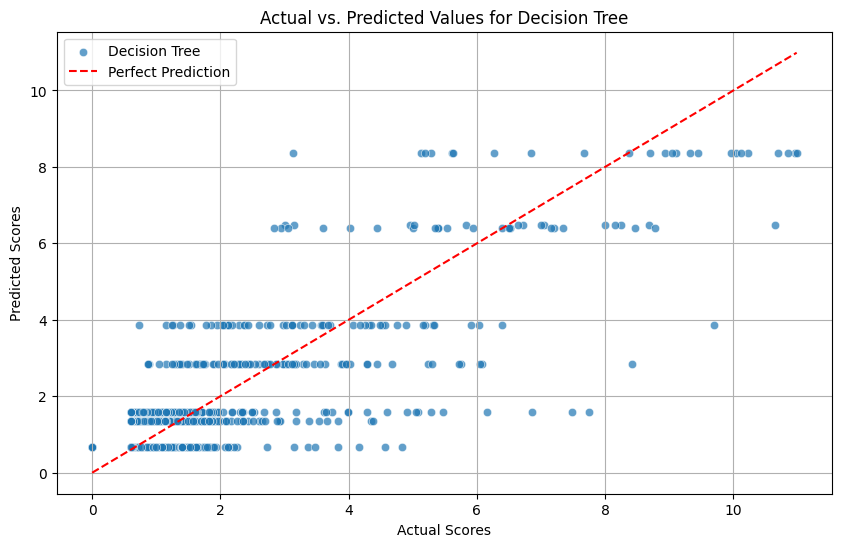

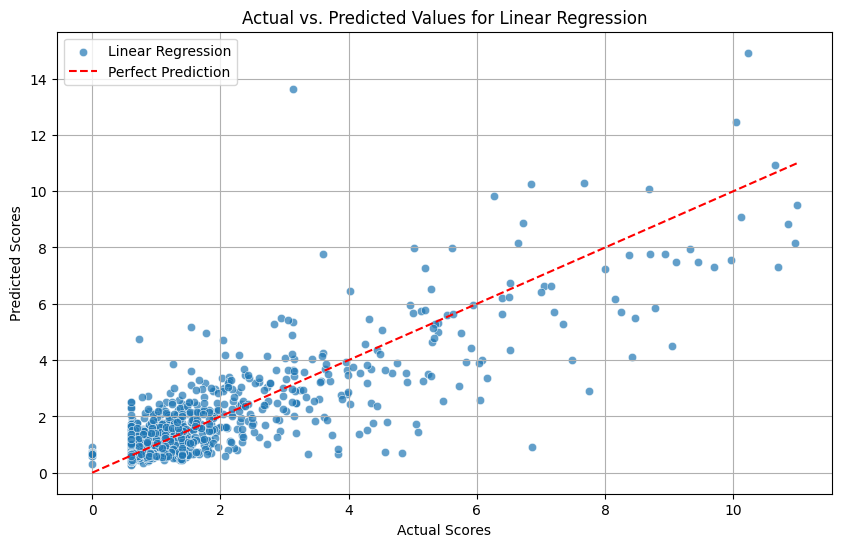

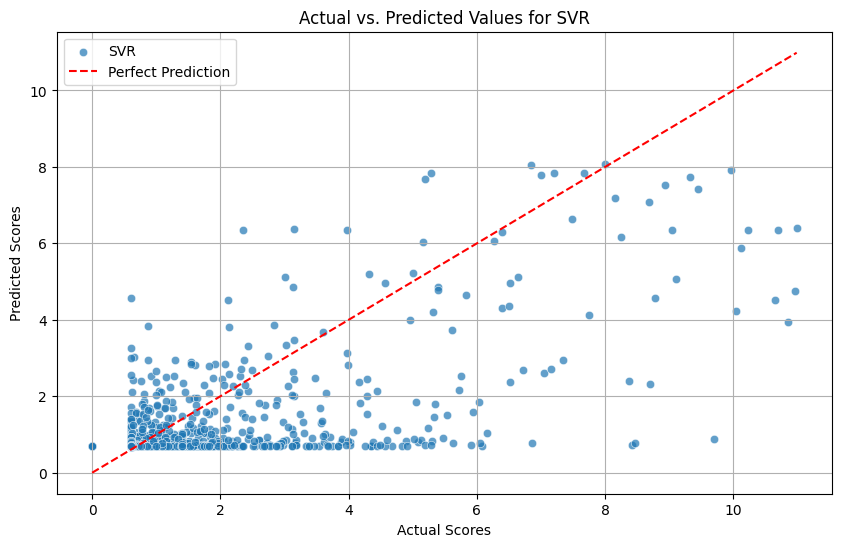

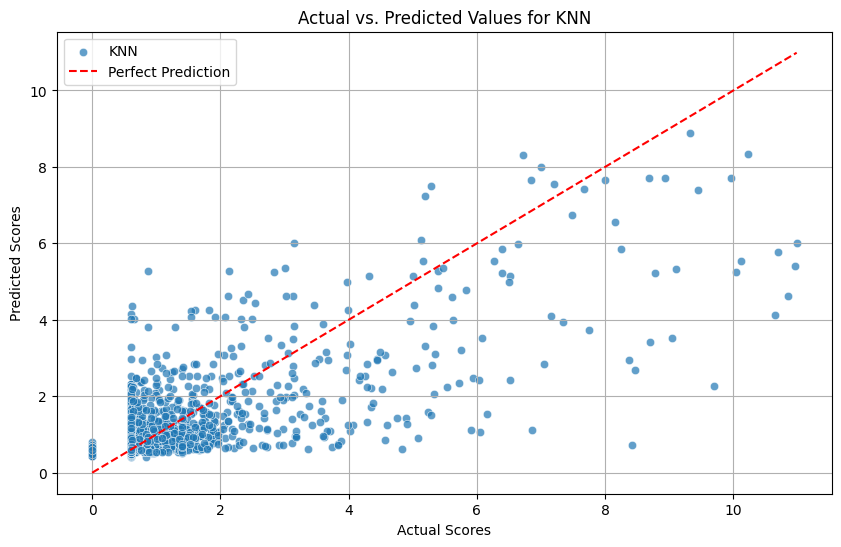

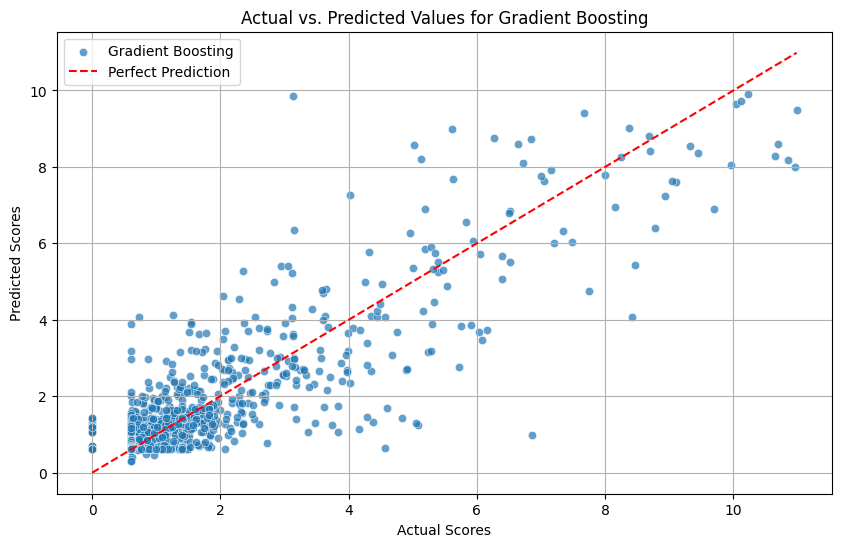

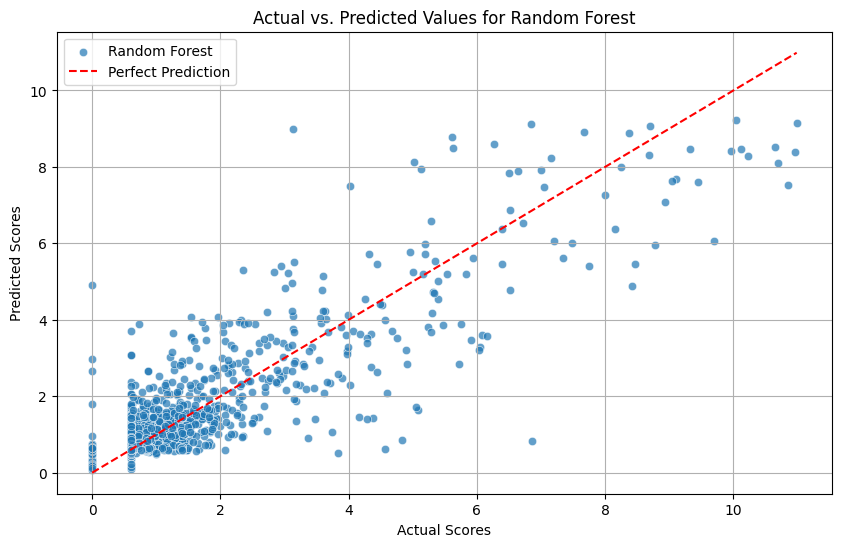

In [ ]:
# Dictionary of model names and their predictions
models = {
    'Decision Tree': dt_predictions,
    'Linear Regression': lr_predictions,
    'SVR': svr_predictions,
    'KNN': knn_predictions,
    'Gradient Boosting': baseline_predictions,
    'Random Forest': rf_predictions
}

# Loop through each model and plot Actual vs Predicted values
for model_name, predictions in models.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'Actual vs. Predicted Values for {model_name}')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

Comparison of Model Performance:
               Model      RMSE       MSE       MAE  R2 Score
0      Decision Tree  0.680893  0.463616  0.314840  0.720583
1  Linear Regression  0.838102  0.702415  0.375288  0.576661
2  Gradient Boosting  0.589614  0.347644  0.263661  0.790478
3      Random Forest  0.605210  0.366279  0.275051  0.779247
4                KNN  0.838102  0.702415  0.375288  0.576661
5                SVR  0.927159  0.859623  0.406377  0.481913


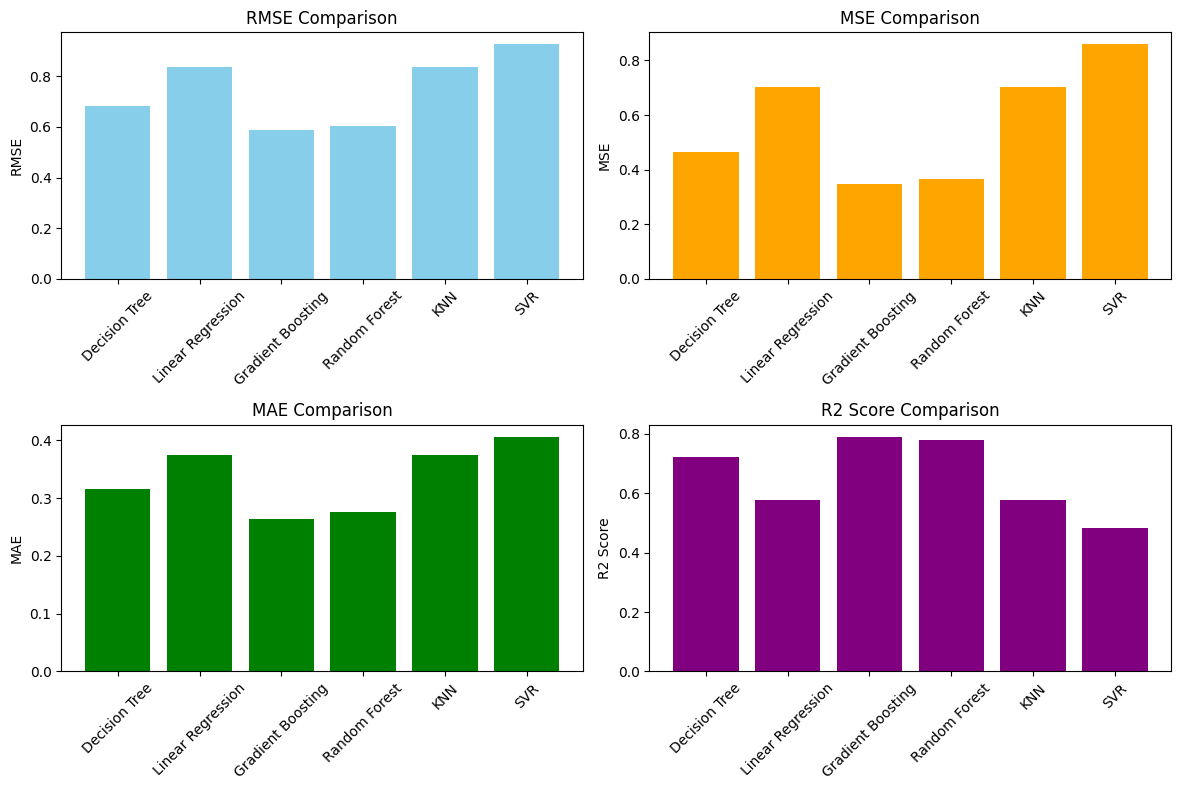

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models and predictions
models = ["Decision Tree", "Linear Regression", "Gradient Boosting", "Random Forest", "KNN", "SVR"]
predictions = [dt_predictions, knn_predictions, baseline_predictions, rf_predictions, knn_predictions, svr_predictions]

# Calculate metrics for each model
metrics = {
    "Model": models,
    "RMSE": [np.sqrt(mean_squared_error(y_test, pred)) for pred in predictions],
    "MSE": [mean_squared_error(y_test, pred) for pred in predictions],
    "MAE": [mean_absolute_error(y_test, pred) for pred in predictions],
    "R2 Score": [r2_score(y_test, pred) for pred in predictions],
}

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Display metrics as a table
print("Comparison of Model Performance:")
print(metrics_df)

# Optional: Visualize metrics
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.subplot(2, 2, 1)
plt.bar(metrics_df["Model"], metrics_df["RMSE"], color="skyblue")
plt.title("RMSE Comparison")
plt.xticks(rotation=45)
plt.ylabel("RMSE")

# Plot MSE
plt.subplot(2, 2, 2)
plt.bar(metrics_df["Model"], metrics_df["MSE"], color="orange")
plt.title("MSE Comparison")
plt.xticks(rotation=45)
plt.ylabel("MSE")

# Plot MAE
plt.subplot(2, 2, 3)
plt.bar(metrics_df["Model"], metrics_df["MAE"], color="green")
plt.title("MAE Comparison")
plt.xticks(rotation=45)
plt.ylabel("MAE")

# Plot R2 Score
plt.subplot(2, 2, 4)
plt.bar(metrics_df["Model"], metrics_df["R2 Score"], color="purple")
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()


In [ ]:
# Normalize metrics for comparison (lower is better for RMSE and MAE, higher is better for R²)
metrics_df["RMSE_Rank"] = metrics_df["RMSE"].rank(ascending=True)
metrics_df["MAE_Rank"] = metrics_df["MAE"].rank(ascending=True)
metrics_df["R2_Rank"] = metrics_df["R2 Score"].rank(ascending=False)

# Calculate total score (lower total score = better model)
metrics_df["Total_Score"] = metrics_df["RMSE_Rank"] + metrics_df["MAE_Rank"] + metrics_df["R2_Rank"]

# Select the best model
best_model = metrics_df.loc[metrics_df["Total_Score"].idxmin()]
print("Best Model Based on RMSE, MAE, and R²:")
print(best_model)


Best Model Based on RMSE, MAE, and R²:
Model          Gradient Boosting
RMSE                    0.589614
MSE                     0.347644
MAE                     0.263661
R2 Score                0.790478
RMSE_Rank                    1.0
MAE_Rank                     1.0
R2_Rank                      1.0
Total_Score                  3.0
Name: 2, dtype: object


In [ ]:
# Sort the metrics DataFrame by Total_Score (ascending order)
ranked_metrics_df = metrics_df.sort_values(by="Total_Score", ascending=True)

# Print the ranked table
print("Model Rankings Based on RMSE, MAE, and R²:")
print(ranked_metrics_df)

Model Rankings Based on RMSE, MAE, and R²:
               Model      RMSE       MSE       MAE  R2 Score  RMSE_Rank  \
2  Gradient Boosting  0.589614  0.347644  0.263661  0.790478        1.0   
3      Random Forest  0.605210  0.366279  0.275051  0.779247        2.0   
0      Decision Tree  0.680893  0.463616  0.314840  0.720583        3.0   
1  Linear Regression  0.838102  0.702415  0.375288  0.576661        4.5   
4                KNN  0.838102  0.702415  0.375288  0.576661        4.5   
5                SVR  0.927159  0.859623  0.406377  0.481913        6.0   

   MAE_Rank  R2_Rank  Total_Score  
2       1.0      1.0          3.0  
3       2.0      2.0          6.0  
0       3.0      3.0          9.0  
1       4.5      4.5         13.5  
4       4.5      4.5         13.5  
5       6.0      6.0         18.0  


Hyperparameter Tuning for GB and RF

In [ ]:
# 1. Hyperparameter Tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],  # Reduced for quicker runtime
    'learning_rate': [0.05, 0.1],  # Focus on fewer learning rates
    'max_depth': [3, 5],  # Fewer depths for simplicity
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_

# Evaluate the tuned model
tuned_gb_predictions = best_gb_model.predict(X_test)
print("Tuned Gradient Boosting Model Performance:")
print(f"Tuned RMSE: {np.sqrt(mean_squared_error(y_test, tuned_gb_predictions))}")
print(f"Tuned MSE: {mean_squared_error(y_test, tuned_gb_predictions)}")
print(f"Tuned MAE: {mean_absolute_error(y_test, tuned_gb_predictions)}")
print(f"Tuned R2: {r2_score(y_test, tuned_gb_predictions)}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Tuned Gradient Boosting Model Performance:
Tuned RMSE: 0.5865086837961369
Tuned MSE: 0.3439924361682769
Tuned MAE: 0.2576876224758397
Tuned R2: 0.7926789371226545


In [ ]:
# 1. Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and model for Random Forest
print("Best Parameters (Random Forest):", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the tuned Random Forest model
tuned_rf_predictions = best_rf_model.predict(X_test)
print("Tuned Random Forest Model Performance:")
print(f"Tuned MSE: {mean_squared_error(y_test, tuned_rf_predictions)}")
print(f"Tuned MAE: {mean_absolute_error(y_test, tuned_rf_predictions)}")
print(f"Tuned R2 : {r2_score(y_test, tuned_rf_predictions)}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters (Random Forest): {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Tuned Random Forest Model Performance:
Tuned MSE: 0.3180174943340156
Tuned MAE: 0.22228212646790546
Tuned R2 : 0.8083337945644091


PCA

In [ ]:
reduced_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reduced4_dataset.csv")
reduced_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.438892,0.074325,-1.370751,1.410728,0.527245
1,0.584938,-0.060517,-1.465183,0.723741,-0.415957
2,2.894667,0.651348,-2.455974,0.239540,-0.252079
3,-1.539896,0.520659,0.735298,-0.389957,0.163304
4,-0.114605,-0.231935,-1.920487,1.929465,0.537495


In [ ]:
# Generate train and test sets
X = reduced_df
y = data['popularity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Tuned GB PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train the tuned model on the PCA dataset
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
pca_predictions = best_gb_model.predict(X_test)

# Evaluate the tuned model on the PCA dataset
pca_rmse = np.sqrt(mean_squared_error(y_test, pca_predictions))
pca_mse = mean_squared_error(y_test, pca_predictions)
pca_mae = mean_absolute_error(y_test, pca_predictions)
pca_r2 = r2_score(y_test, pca_predictions)

# Print the evaluation metrics
print("Tuned Gradient Boosting Model Performance on PCA Dataset:")
print(f"PCA RMSE: {pca_rmse}")
print(f"PCA MSE: {pca_mse}")
print(f"PCA MAE: {pca_mae}")
print(f"PCA R2: {pca_r2}")


Tuned Gradient Boosting Model Performance on PCA Dataset:
PCA RMSE: 0.5961679446573702
PCA MSE: 0.3554162182369932
PCA MAE: 0.23543976847202128
PCA R2: 0.7857939292226354


In [ ]:
#Tuned RF PCA

# Train the tuned Random Forest model on the PCA dataset
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
pca_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model on the PCA dataset
pca_rf_mse = mean_squared_error(y_test, pca_rf_predictions)
pca_rf_mae = mean_absolute_error(y_test, pca_rf_predictions)
pca_rf_r2 = r2_score(y_test, pca_rf_predictions)
pca_rf_rmse = np.sqrt(pca_rf_mse)

# Print the evaluation metrics
print("Tuned Random Forest Model Performance on PCA Dataset:")
print(f"PCA RMSE: {pca_rf_rmse}")
print(f"PCA MSE: {pca_rf_mse}")
print(f"PCA MAE: {pca_rf_mae}")
print(f"PCA R2: {pca_rf_r2}")

Tuned Random Forest Model Performance on PCA Dataset:
PCA RMSE: 0.5639303984837274
PCA MSE: 0.3180174943340156
PCA MAE: 0.22228212646790546
PCA R2: 0.8083337945644091


In [ ]:
# Create a dictionary to store the metrics for both models
comparison_data = {
    "Model": ["Gradient Boosting", "Random Forest"],
    "RMSE": [pca_rmse, pca_rf_rmse],
    "MSE": [pca_mse, pca_rf_mse],
    "MAE": [pca_mae, pca_rf_mae],
    "R²": [pca_r2, pca_rf_r2]
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Comparison of Tuned GB and RF Models on PCA Dataset:")
print(comparison_df)


Comparison of Tuned GB and RF Models on PCA Dataset:
               Model      RMSE       MSE       MAE        R²
0  Gradient Boosting  0.596168  0.355416  0.235440  0.785794
1      Random Forest  0.563930  0.318017  0.222282  0.808334


SHAP

100%|===================| 2467/2475 [03:07<00:00]       

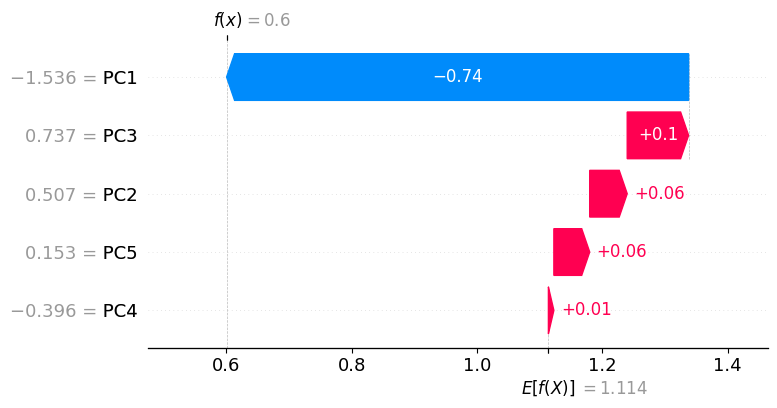

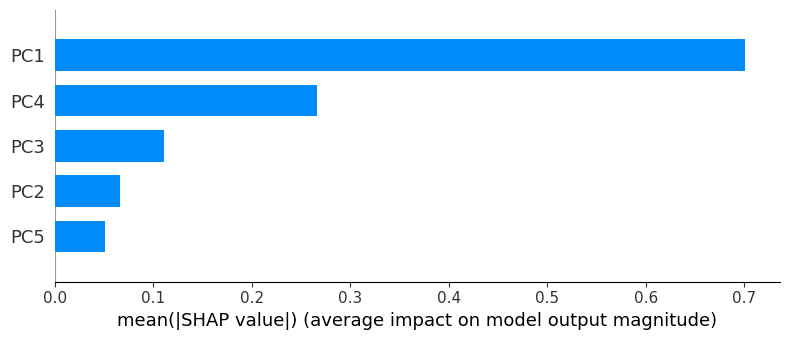

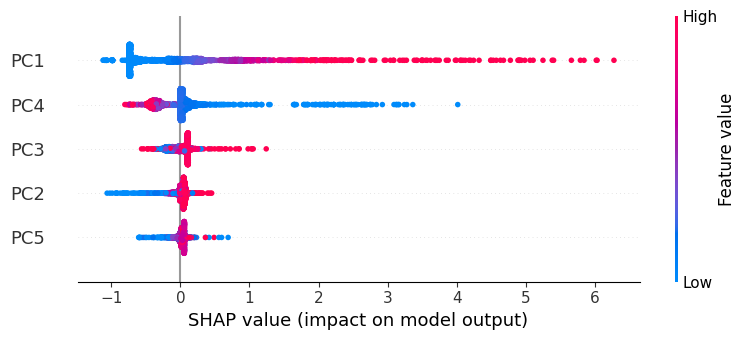

In [ ]:
# SHAP for Tuned RF PCA

# Initialize SHAP explainer (for scikit-learn's Gradient Boosting Regressor)
explainer = shap.Explainer(best_rf_model, X_train)

# Compute SHAP values for the test dataset
shap_values = explainer(X_test)

# Visualize a single prediction (e.g., first instance in the test set)
shap.waterfall_plot(shap_values[0])

# Summary plot for the entire test set
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed beeswarm plot for feature importance
shap.summary_plot(shap_values, X_test)


### h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()